In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [21]:
haberman = pd.read_csv("haberman.csv", names = ["Age", "Year", "#of oxillary nodes", "Survival Status"], header = None)

In [22]:
haberman


,Age,Year,#of oxillary nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [23]:
print(haberman.shape)

(306, 4)


In [24]:
print(haberman.columns)

Index(['Age', 'Year', '#of oxillary nodes', 'Survival Status'], dtype='object')


In [27]:
#Out of 306 sample, 225 patients who survived and 81 patients who are died with in 5 years of post-operation.
haberman["Survival Status"].value_counts()

1    225
2     81
Name: Survival Status, dtype: int64

In [28]:
#percentage of each class is different like 73.52 & 26.47. The dataset is imbalanced dataset.
haberman["Survival Status"].value_counts(normalize = True)*100

1    73.529412
2    26.470588
Name: Survival Status, dtype: float64

**(2). Bi-Variate Analysis: 2-d plot, pair-plot**

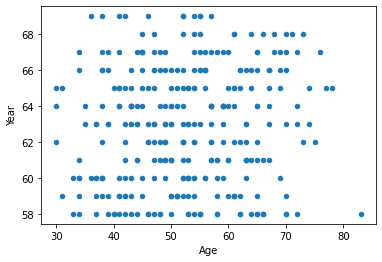

In [31]:
haberman.plot(kind = "scatter", x = "Age", y = "Year")

This plot doesn't mean anything

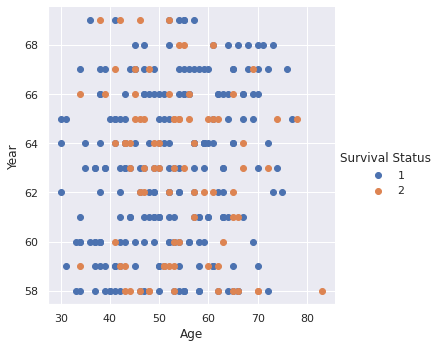

In [63]:
sbn.FacetGrid(haberman, hue = "Survival Status", height = 5).map(plt.scatter, "Age", "Year").add_legend()

point are shuffled or jumbled, so we can't understand much features.
we should now use to seaborn pair plot

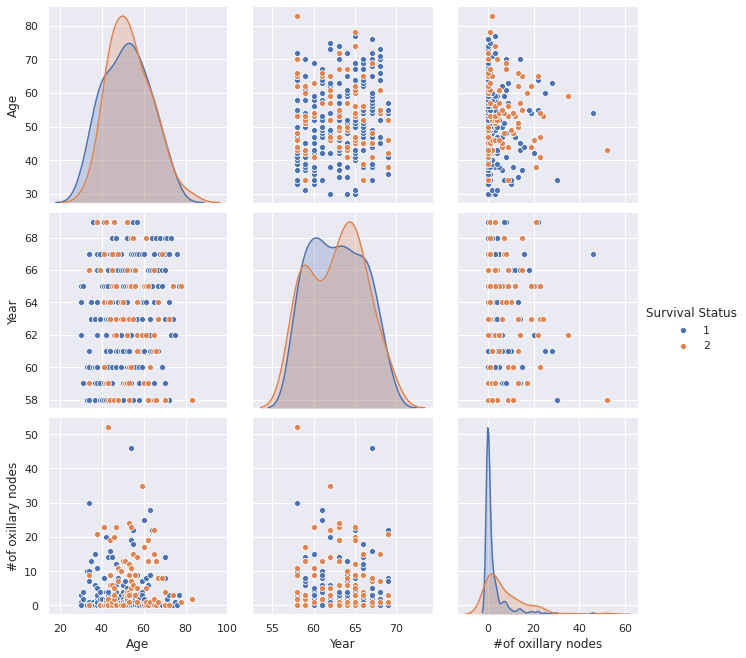

In [38]:
sbn.set()
sbn.pairplot(haberman, hue = "Survival Status", height = 3)

again, here all the features are not seperated then it is difficult to predict survival status from simple model

**Univariate Analysis: Histogram, Pdf, Cdf**

In [39]:
survived = haberman[haberman["Survival Status"] == 1]
not_survived = haberman[haberman["Survival Status"] == 2]


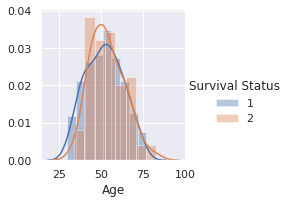

In [41]:
sbn.set()
sbn.FacetGrid(haberman, hue = "Survival Status").map(sbn.distplot, "Age").add_legend()

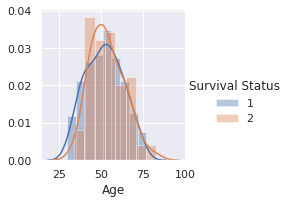

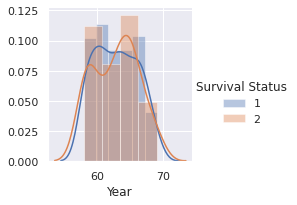

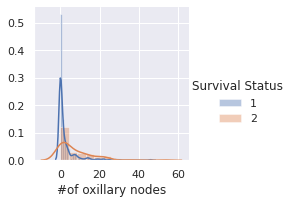

In [44]:
sbn.set()
for i, feature in enumerate(list(haberman.columns[:-1])):
    sbn.FacetGrid(haberman, hue="Survival Status")\
        .map(sbn.distplot, feature)\
        .add_legend()
plt.show()

The more number of auxillary nodes, have the more survival rate

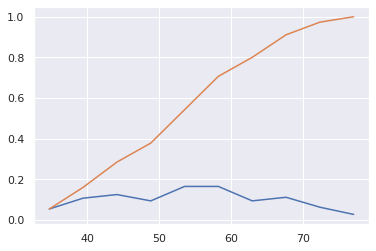

In [65]:
# Histogram: it tells you the number of values in the each bin/ and how frequent the value occurs.
# on x-axis we plot the bins and on y-axis we plot count of the values
counts, bin_edges = np.histogram(survived["Age"], bins=10, density = True)
#plt.plot(bin_edges[1:], counts)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

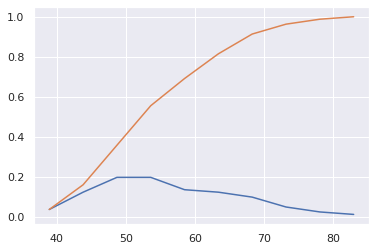

In [47]:
counts, bin_edges = np.histogram(not_survived["Age"], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

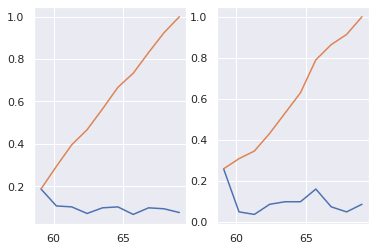

In [66]:
counts, bin_edges = np.histogram(survived["Year"], bins=10, density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.figure(1)
plt.subplot(1, 2, 1)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.subplot(1, 2, 2)
counts, bin_edges = np.histogram(not_survived["Year"], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

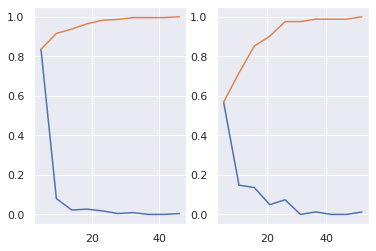

In [55]:
counts, bin_edges = np.histogram(survived["#of oxillary nodes"], bins=10, density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.figure(1)
plt.subplot(1, 2, 1)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.subplot(1, 2, 2)
counts, bin_edges = np.histogram(not_survived["#of oxillary nodes"], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

**Observation:** 80% of people survived with having less than 10 axillary nodes. The more number of axillary nodes having the less chance of survival rate.

**(4). Central tendency: Mean, Median, Standard deviation**

In [56]:
print("*" * 100)
print("Means: ")
print("Average age of Survived people", np.mean(survived["Age"]))
print("Average age of not-survived people", np.mean(not_survived["Age"]))

print("*" * 100)
print("Standard Deviations: ")
print(np.std(survived["Age"]))
print(np.std(not_survived["Age"]))

print("*" * 100)
print("Medians: ")
print(np.median(survived["Age"]))
print(np.median(not_survived["Age"]))


****************************************************************************************************
Means: 
Average age of Survived people 52.01777777777778
Average age of not-survived people 53.67901234567901
****************************************************************************************************
Standard Deviations: 
10.98765547510051
10.10418219303131
****************************************************************************************************
Medians: 
52.0
53.0


**(5). Percentile, Quartiles, Boxplot, Violin plot**

In [57]:
print("Percentiles: ")
print(np.percentile(survived["Age"], 90))
print(np.percentile(not_survived["Age"], 90))
print("*" * 50)

print("Quartiles:")
print(np.percentile(survived["Age"], list(range(25,101, 25))))
print(np.percentile(not_survived["Age"], list(range(25, 101, 25))))


Percentiles: 
67.0
67.0
**************************************************
Quartiles:
[43. 52. 60. 77.]
[46. 53. 61. 83.]


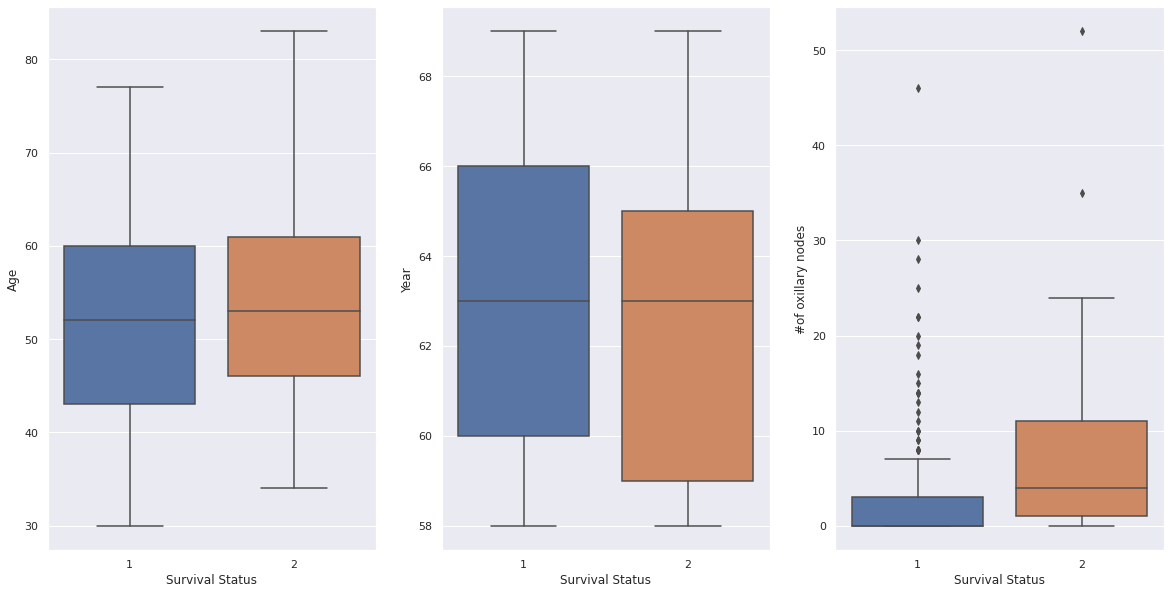

In [59]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sbn.boxplot(x="Survival Status", y="Age", data=haberman)

plt.subplot(1,3,2)
sbn.boxplot(x="Survival Status", y="Year", data=haberman)

plt.subplot(1,3,3)
sbn.boxplot(x="Survival Status", y="#of oxillary nodes", data=haberman)
plt.show()

*  The box plot tells you about the percentiles and it helps to find outliers.
*  It has quartiles 25%, 50%, 75%, 100% as Q1, Q2, Q3, Q4
*  The midle line in the box is the 50th percentile and above the middle line is 75 percentile and below the middle line is the 25th percentile.
*  The vertical lines in each box plot are called whiskers. whskers are plotted based on the IQR(Inter Quartile range) i.e. Q3-Q1.
*  The lower whisker(Q1) = 1.5 * IQR where as Q4 = Q3+1.5*IQR 
*  Q2 is the median
*  Outliers are represented as dots outside the whiskers

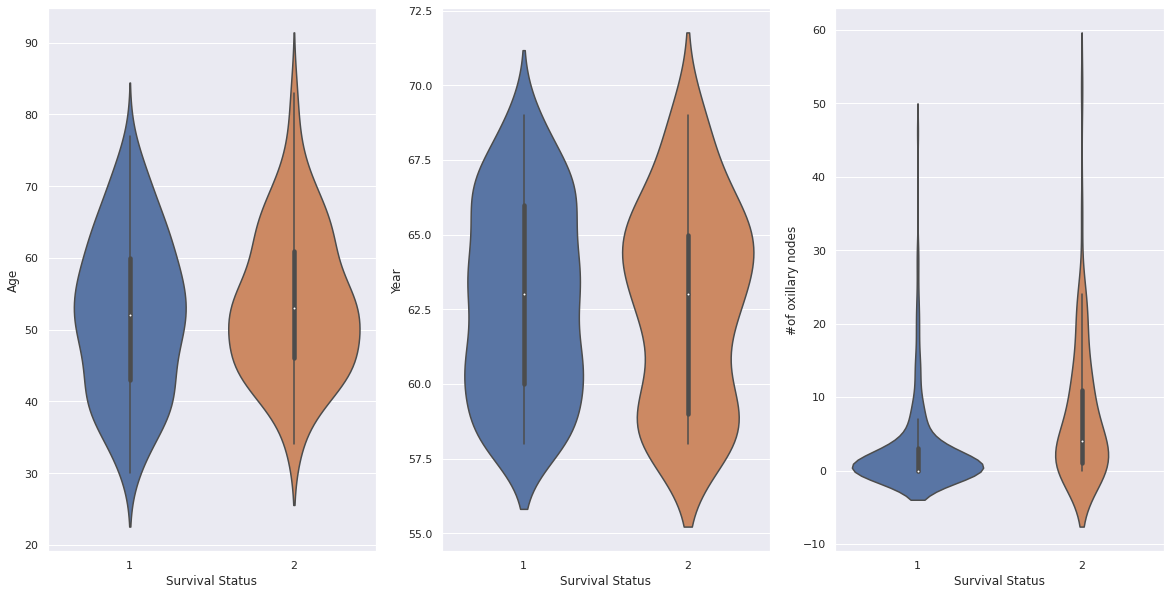

In [61]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
sbn.violinplot(x="Survival Status", y="Age", data=haberman)
plt.subplot(1, 3, 2)
sbn.violinplot(x="Survival Status", y="Year", data=haberman)
plt.subplot(1, 3, 3)
sbn.violinplot(x="Survival Status", y="#of oxillary nodes", data=haberman)
plt.show()